# Import Labelers 

In [1]:
# Essential Libraries
import pandas as pd  # Data manipulation
import numpy as np  # Numerical operations
import matplotlib.pyplot as plt  # Plotting
import seaborn as sns  # Statistical data visualization

# Machine Learning Libraries
from sklearn.model_selection import train_test_split  # Data splitting
from sklearn.naive_bayes import GaussianNB  # Naive Bayes classifier
from sklearn.linear_model import LogisticRegression  # Logistic Regression
from sklearn.tree import DecisionTreeClassifier  # Decision Tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # Ensemble methods
from sklearn.metrics import accuracy_score, classification_report  # Evaluation metrics

# Warnings
import warnings  # Handle warnings
warnings.filterwarnings('ignore')  # Suppress warnings for clean output


# Data

In [2]:
# Load datasets
train = pd.read_csv("train.csv")  # Training data
test = pd.read_csv("test.csv")  # Testing data

# Combine train and test data for analysis
df = pd.concat([train, test], ignore_index=True)


In [3]:
df

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0.0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1.0
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1.0
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1.0
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234495,234495,Zoya,Female,49.0,Jaipur,Working Professional,Pilot,NaN,3.0,NaN,NaN,5.0,Less than 5 hours,Moderate,BSc,Yes,2.0,2.0,Yes,NaN
234496,234496,Shlok,Male,29.0,Ahmedabad,Working Professional,Pilot,NaN,5.0,NaN,NaN,1.0,7-8 hours,Moderate,BE,Yes,11.0,3.0,Yes,NaN
234497,234497,Rishi,Male,24.0,Visakhapatnam,Student,NaN,1.0,NaN,7.51,4.0,NaN,7-8 hours,Moderate,B.Tech,No,7.0,1.0,No,NaN
234498,234498,Eshita,Female,23.0,Kalyan,Working Professional,Marketing Manager,NaN,4.0,NaN,NaN,2.0,5-6 hours,Healthy,BA,Yes,7.0,5.0,Yes,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234500 entries, 0 to 234499
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     234500 non-null  int64  
 1   Name                                   234500 non-null  object 
 2   Gender                                 234500 non-null  object 
 3   Age                                    234500 non-null  float64
 4   City                                   234500 non-null  object 
 5   Working Professional or Student        234500 non-null  object 
 6   Profession                             173238 non-null  object 
 7   Academic Pressure                      46664 non-null   float64
 8   Work Pressure                          187804 non-null  float64
 9   CGPA                                   46664 non-null   float64
 10  Study Satisfaction                     46664 non-null   

In [5]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,234500.0000,234500.000000,46664.000000,187804.000000,46664.000000,46664.000000,187816.000000,234500.000000,234496.000000,140700.000000
mean,117249.5000,40.361847,3.148830,3.004111,7.664821,2.942761,2.969018,6.250542,2.984895,0.181713
std,67694.4634,12.387870,1.382966,1.404900,1.464707,1.365851,1.413948,3.855438,1.414027,0.385609
min,0.0000,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,58624.7500,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,117249.5000,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,175874.2500,51.000000,4.000000,4.000000,8.930000,4.000000,4.000000,10.000000,4.000000,0.000000
max,234499.0000,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


In [6]:
columns = df.columns

In [7]:
for column in columns:
    print(df[column].value_counts())

id
0         1
156325    1
156327    1
156328    1
156329    1
         ..
78169     1
78170     1
78171     1
78172     1
234499    1
Name: count, Length: 234500, dtype: int64
Name
Rohan       5290
Aarav       3835
Rupak       3610
Aaradhya    3468
Anvi        3433
            ... 
Rupai          1
Ayya           1
Abarav         1
Shivwar        1
Anmay          1
Name: count, Length: 554, dtype: int64
Gender
Male      128726
Female    105774
Name: count, dtype: int64
Age
56.00    8678
49.00    8524
38.00    7572
53.00    7484
57.00    7270
47.00    6939
46.00    6808
18.00    6535
54.00    6477
51.00    6471
43.00    6362
59.00    6332
48.00    6154
45.00    5864
20.00    5850
50.00    5750
42.00    5688
24.00    5651
28.00    5630
39.00    5541
44.00    5459
29.00    5249
41.00    5233
33.00    5197
40.00    5044
58.00    4914
25.00    4884
35.00    4774
23.00    4770
55.00    4769
21.00    4672
37.00    4513
36.00    4445
19.00    4365
34.00    4363
27.00    4332
52.00    4276
31.

# Missing data

In [8]:
df.isnull().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                61262
Academic Pressure                        187836
Work Pressure                             46696
CGPA                                     187836
Study Satisfaction                       187836
Job Satisfaction                          46684
Sleep Duration                                0
Dietary Habits                                9
Degree                                        4
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                93800
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0.0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1.0
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1.0
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1.0
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234495,234495,Zoya,Female,49.0,Jaipur,Working Professional,Pilot,NaN,3.0,NaN,NaN,5.0,Less than 5 hours,Moderate,BSc,Yes,2.0,2.0,Yes,NaN
234496,234496,Shlok,Male,29.0,Ahmedabad,Working Professional,Pilot,NaN,5.0,NaN,NaN,1.0,7-8 hours,Moderate,BE,Yes,11.0,3.0,Yes,NaN
234497,234497,Rishi,Male,24.0,Visakhapatnam,Student,NaN,1.0,NaN,7.51,4.0,NaN,7-8 hours,Moderate,B.Tech,No,7.0,1.0,No,NaN
234498,234498,Eshita,Female,23.0,Kalyan,Working Professional,Marketing Manager,NaN,4.0,NaN,NaN,2.0,5-6 hours,Healthy,BA,Yes,7.0,5.0,Yes,NaN


### Profession missing column  

In [11]:
# Assuming 'Profession' is the column where you want to fill missing values with 'Student' according to Working Professional or Student column
clean_df = df.copy()
clean_df.loc[
    clean_df['Profession'].isnull() & (clean_df['Academic Pressure'].notna()),  # Check for missing values in 'Profession' and non-null 'Academic Pressure'
    'Profession'
] = 'Student'  # Fill missing values with 'Student'


In [12]:
# # Fill missing 'Profession' based on assumptions, e.g., 'Student' where applicable
# clean_df = df.copy()
# clean_df['Profession'] = clean_df['Profession'].fillna(
#     clean_df.apply(lambda row: 'Student' if row['Working Professional or Student'] == 'Student' else 'Professional', axis=1)
# )

In [13]:
clean_df.isnull().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                14659
Academic Pressure                        187836
Work Pressure                             46696
CGPA                                     187836
Study Satisfaction                       187836
Job Satisfaction                          46684
Sleep Duration                                0
Dietary Habits                                9
Degree                                        4
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                93800
dtype: int64

In [14]:
clean_df.loc[clean_df['Profession'].isnull()]['Degree'].value_counts(dropna=False)

Degree
Class 12         14336
BCA                 24
B.Arch              24
BHM                 17
B.Ed                17
B.Com               16
M.Com               16
MD                  15
MCA                 15
M.Pharm             13
MBA                 13
B.Tech              13
BSc                 11
LLB                 11
BBA                 11
B.Pharm             11
BE                  11
MA                  10
LLM                  9
PhD                  9
M.Tech               8
ME                   8
MBBS                 8
MSc                  6
BA                   6
M.Ed                 6
MHM                  5
NaN                  2
B.Study_Hours        1
M                    1
5.56                 1
Navya                1
5.88                 1
Degree               1
LLBA                 1
5.65                 1
Name: count, dtype: int64

In [15]:
clean_df.loc[clean_df['Degree'].isnull()]

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
110064,110064,Riya,Female,28.0,Srinagar,Working Professional,NaN,NaN,3.0,NaN,NaN,3.0,5-6 hours,Unhealthy,NaN,Yes,4.0,2.0,Yes,1.0
128934,128934,Anaya,Female,28.0,Srinagar,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,Less than 5 hours,Unhealthy,NaN,Yes,3.0,3.0,Yes,0.0
197408,197408,Aishwarya,Female,20.0,Ludhiana,Working Professional,HR Manager,NaN,4.0,NaN,NaN,1.0,Less than 5 hours,Healthy,NaN,Yes,2.0,1.0,No,NaN
233698,233698,Charvi,Female,32.0,Varanasi,Student,Student,1.0,NaN,6.83,3.0,NaN,Less than 5 hours,Unhealthy,NaN,No,0.0,4.0,No,NaN


In [16]:
clean_df['Degree'].value_counts(dropna=False)

Degree
Class 12    24541
B.Ed        19453
B.Arch      14779
B.Com       13552
B.Pharm      9843
            ...  
CGPA            1
ACA             1
B.B.Arch        1
7.06            1
BHCA            1
Name: count, Length: 157, dtype: int64

In [17]:
clean_df.loc[clean_df['Degree'].isin(['Class 12'])]['Sleep Duration'].value_counts(dropna=False)

Sleep Duration
Less than 5 hours    7835
7-8 hours            5928
More than 8 hours    5482
5-6 hours            5288
4-5 hours               2
3-4 hours               1
49 hours                1
1-6 hours               1
9-5                     1
9-6 hours               1
8-9 hours               1
Name: count, dtype: int64

In [18]:
clean_df.loc[clean_df['Sleep Duration'].isin(['Less than 5 hours'])]['Profession'].value_counts()

Profession
Student                   13883
Teacher                   10841
Content Writer             3504
Architect                  1829
Consultant                 1820
Pharmacist                 1743
HR Manager                 1703
Doctor                     1464
Business Analyst           1441
Educational Consultant     1321
Chef                       1251
Chemist                    1242
Entrepreneur               1241
Data Scientist             1160
Researcher                 1146
Customer Support           1035
Lawyer                      931
Pilot                       915
Marketing Manager           856
Sales Executive             808
Financial Analyst           779
Travel Consultant           727
Manager                     722
Electrician                 704
Plumber                     697
Judge                       686
UX/UI Designer              658
Civil Engineer              650
Digital Marketer            627
Software Engineer           597
Accountant                  5

In [19]:
# Replace null values in the 'Profession' column with "Student" 
# without altering other columns in the dataset
clean_df.loc[clean_df['Profession'].isnull(), 'Profession'] = "Student"

In [20]:
clean_df.isnull().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                    0
Academic Pressure                        187836
Work Pressure                             46696
CGPA                                     187836
Study Satisfaction                       187836
Job Satisfaction                          46684
Sleep Duration                                0
Dietary Habits                                9
Degree                                        4
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                93800
dtype: int64

### Academic Pressure missing column

In [21]:
clean_df['Academic Pressure'].value_counts()

Academic Pressure
3.0    12393
5.0    10617
4.0     8709
1.0     8053
2.0     6892
Name: count, dtype: int64

In [22]:
# consider 0 as they are not Students or median
clean_df.loc[clean_df['Academic Pressure'].isnull(), 'Academic Pressure'] = clean_df['Academic Pressure'].median()

### Work Pressure missing column

In [23]:
clean_df['Work Pressure'].value_counts()

Work Pressure
2.0    40628
5.0    37549
4.0    37486
3.0    36549
1.0    35592
Name: count, dtype: int64

In [24]:
# Replace null values in the 'Work Pressure' column with 0,
# assuming that missing values indicate the absence of work pressure. they are Students
clean_df.loc[clean_df['Work Pressure'].isnull(), 'Work Pressure'] = clean_df['Work Pressure'].median()

### CGPA missing column

In [25]:
clean_df['CGPA'].describe()

count    46664.000000
mean         7.664821
std          1.464707
min          5.030000
25%          6.290000
50%          7.770000
75%          8.930000
max         10.000000
Name: CGPA, dtype: float64

In [26]:
# # consider 0 as they are not Students
# clean_df.loc[clean_df['CGPA'].isnull(), 'CGPA'] = 0

In [27]:
# Calculate the mean of the 'CGPA' column
cgpa_mean = clean_df['CGPA'].mean()

# Fill missing values in 'CGPA' with the calculated mean
clean_df.loc[clean_df['CGPA'].isnull(), 'CGPA'] = cgpa_mean

### Study Satisfaction missing column

In [28]:
clean_df['Study Satisfaction'].value_counts()

Study Satisfaction
4.0    10535
3.0     9703
2.0     9678
1.0     9256
5.0     7492
Name: count, dtype: int64

In [29]:
clean_df.loc[clean_df['Study Satisfaction'].isnull(), 'Study Satisfaction'] = clean_df['Study Satisfaction'].median()

### Job Satisfaction missing column

In [30]:
clean_df['Job Satisfaction'].value_counts()

Job Satisfaction
2.0    41754
5.0    37639
1.0    37117
3.0    36415
4.0    34891
Name: count, dtype: int64

In [31]:
clean_df.loc[clean_df['Job Satisfaction'].isnull(), 'Job Satisfaction'] = clean_df['Job Satisfaction'].median()

In [32]:
clean_df.isnull().sum()

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                                   0
Academic Pressure                            0
Work Pressure                                0
CGPA                                         0
Study Satisfaction                           0
Job Satisfaction                             0
Sleep Duration                               0
Dietary Habits                               9
Degree                                       4
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             4
Family History of Mental Illness             0
Depression                               93800
dtype: int64

### Dietary Habits missing column

In [33]:
clean_df['Dietary Habits'].value_counts()

Dietary Habits
Moderate             82723
Unhealthy            77013
Healthy              74707
No                       8
More Healthy             4
Indoor                   2
Male                     2
Yes                      2
1.0                      2
Less Healthy             2
Academic                 1
Resistant                1
MCA                      1
5 Healthy                1
Educational              1
Prachi                   1
Soham                    1
5 Unhealthy              1
Vivaan                   1
Raghav                   1
Naina                    1
Mealy                    1
Pratham                  1
2                        1
Class 12                 1
BSc                      1
Vegas                    1
M.Tech                   1
No Healthy               1
Electrician              1
Hormonal                 1
Mihir                    1
Less than Healthy        1
3                        1
Gender                   1
Kolkata                  1
Name: count, 

In [34]:
# Fill missing values in 'Dietary Habits' with the most frequent value
most_frequent_diet = clean_df['Dietary Habits'].mode()[0]
clean_df['Dietary Habits'].fillna(most_frequent_diet, inplace=True)

### Degree missing column

In [35]:
clean_df['Degree'].value_counts()[:30]

Degree
Class 12    24541
B.Ed        19453
B.Arch      14779
B.Com       13552
B.Pharm      9843
BCA          9608
M.Ed         9375
MCA          8672
BBA          8417
BSc          8341
MSc          7975
LLM          7780
M.Pharm      7532
M.Tech       7492
B.Tech       7310
LLB          7286
BHM          7081
MBA          6288
BA           6240
ME           6023
MD           5672
MHM          5435
BE           5270
M.Com        5222
PhD          5176
MBBS         5115
MA           4820
M.Arch         14
B.Sc            7
BPharm          5
Name: count, dtype: int64

In [36]:
# Fill missing values in the 'Degree' column with the most frequent value
most_frequent_degree = clean_df['Degree'].mode()[0]
clean_df['Degree'].fillna(most_frequent_degree, inplace=True)

### Financial Stress missing column

In [37]:
clean_df['Financial Stress'].value_counts()

Financial Stress
2.0    52602
5.0    46973
4.0    46218
1.0    45552
3.0    43151
Name: count, dtype: int64

In [38]:
# Fill missing values in the 'Financial Stress' column with the mean value
mean_financial_stress = clean_df['Financial Stress'].mode()[0]
clean_df['Financial Stress'].fillna(mean_financial_stress, inplace=True)


# 4. Data Featuring 

In [44]:
cleaned_df = clean_df.copy()

## 4.1 City

In [39]:
cleaned_df.groupby('City', as_index=False).agg(
    Depression_count=('Depression', 'count'),
    Depression_mean=('Depression', 'mean')
).sort_values(by='Depression_count', ascending=False)[:20]

,City,Depression_count,Depression_mean
45,Kalyan,6591,0.199666
88,Patna,5924,0.163234
119,Vasai-Virar,5765,0.197918
53,Kolkata,5689,0.173668
6,Ahmedabad,5613,0.217887
71,Meerut,5528,0.134045
62,Ludhiana,5226,0.192690
93,Pune,5210,0.161036
95,Rajkot,5207,0.173228
123,Visakhapatnam,5176,0.159196


In [41]:
# city_target_mean = cleaned_df.groupby('City')['Depression'].mean()
# cleaned_df['City_encoded'] = cleaned_df['City'].map(city_target_mean)

In [42]:
# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()
# cleaned_df['City_encoded'] = encoder.fit_transform(cleaned_df['City'])

In [43]:
city_freq = cleaned_df['City'].value_counts() / len(df)
cleaned_df['City_encoded'] = cleaned_df['City'].map(city_freq)

In [40]:
cleaned_df['City'].value_counts()[:40]

City
Kalyan           10978
Patna             9812
Vasai-Virar       9662
Kolkata           9415
Ahmedabad         9290
Meerut            9189
Ludhiana          8771
Rajkot            8657
Srinagar          8621
Visakhapatnam     8592
Pune              8528
Mumbai            8095
Indore            7912
Agra              7873
Vadodara          7737
Surat             7726
Varanasi          7658
Hyderabad         7619
Kanpur            7376
Jaipur            7202
Lucknow           7140
Thane             7124
Nagpur            6957
Bangalore         6830
Chennai           6718
Delhi             6129
Ghaziabad         6106
Bhopal            5845
Faridabad         5464
Nashik            5326
Mihir                7
Vidya                7
Bhavna               6
City                 5
Nalini               4
Saanvi               4
Nandini              4
Keshav               4
Pratyush             4
Harsha               3
Name: count, dtype: int64

## 4.2 Work/Academic Pressure

In [45]:
cleaned_df['Work/Academic Pressure']=cleaned_df['Work Pressure']+cleaned_df['Academic Pressure'] /2
cleaned_df['Job/Study Satisfaction']=cleaned_df['Job Satisfaction']+cleaned_df['Study Satisfaction'] /2

In [46]:
df_numerical_features   = cleaned_df.select_dtypes(exclude='object')
df_categorical_features = cleaned_df.select_dtypes(include='object')

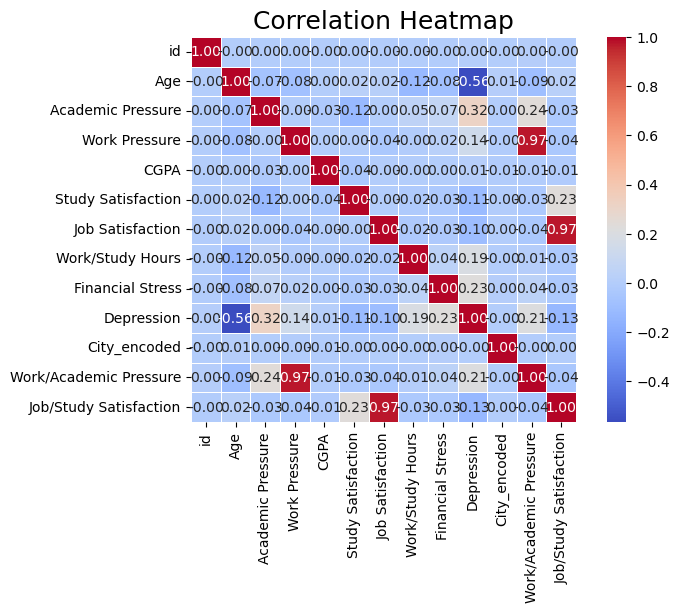

In [47]:
def plot_correlation_heatmap(data):
    plt.figure(figsize=(8, 5))
    correlation_matrix = data.corr()
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)
    plt.title('Correlation Heatmap', fontsize=18)
    plt.show()

# Call the function to plot
plot_correlation_heatmap(df_numerical_features)

In [48]:
# List of columns to calculate the median
columns_to_median = ['Academic Pressure', 'Study Satisfaction']

# Create a new column 'Median Score' with the median of the specified columns
cleaned_df['Academic Median Score'] = cleaned_df[columns_to_median].median(axis=1)

# Display the updated DataFrame
cleaned_df

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,...,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,City_encoded,Work/Academic Pressure,Job/Study Satisfaction,Academic Median Score
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,3.0,5.0,7.664821,...,BHM,No,1.0,2.0,No,0.0,0.037403,6.5,3.5,3.0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,3.0,4.0,7.664821,...,LLB,Yes,7.0,3.0,No,1.0,0.032657,5.5,4.5,3.0
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,Student,5.0,3.0,8.970000,...,B.Pharm,Yes,3.0,1.0,No,1.0,0.036640,5.5,4.0,3.5
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,3.0,5.0,7.664821,...,BBA,Yes,10.0,1.0,Yes,1.0,0.034520,6.5,2.5,3.0
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,3.0,1.0,7.664821,...,BBA,Yes,9.0,4.0,Yes,0.0,0.031454,2.5,2.5,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234495,234495,Zoya,Female,49.0,Jaipur,Working Professional,Pilot,3.0,3.0,7.664821,...,BSc,Yes,2.0,2.0,Yes,NaN,0.030712,4.5,6.5,3.0
234496,234496,Shlok,Male,29.0,Ahmedabad,Working Professional,Pilot,3.0,5.0,7.664821,...,BE,Yes,11.0,3.0,Yes,NaN,0.039616,6.5,2.5,3.0
234497,234497,Rishi,Male,24.0,Visakhapatnam,Student,Student,1.0,3.0,7.510000,...,B.Tech,No,7.0,1.0,No,NaN,0.036640,3.5,5.0,2.5
234498,234498,Eshita,Female,23.0,Kalyan,Working Professional,Marketing Manager,3.0,4.0,7.664821,...,BA,Yes,7.0,5.0,Yes,NaN,0.046814,5.5,3.5,3.0


In [49]:
# List of columns to calculate the median
columns_to_median_job = ['Job Satisfaction', 'Work Pressure']

# Create a new column 'Median Score' with the median of the specified columns
cleaned_df['job Median Score'] = cleaned_df[columns_to_median_job].median(axis=1)

In [50]:
ready_df = cleaned_df.drop(['id'], axis=1)

## 4.3 Gender

In [51]:
ready_df.groupby('Gender', as_index=False).agg(
    Depression_count=('Depression', 'count'),
    Depression_mean=('Depression', 'mean')
).sort_values(by='Depression_count', ascending=False)

,Gender,Depression_count,Depression_mean
1,Male,77464,0.184550
0,Female,63236,0.178237


In [52]:
# Encoding 
ready_df['Gender'] = ready_df['Gender'].map({'Male': 0, 'Female': 1})

## 4.4 Age

In [53]:
# Divide the Age feature into 5 equal-width categories to create age groups
ready_df['CategoricalAge'] = pd.cut(ready_df['Age'], 5)

# Calculate the average survival rate for each age category
ready_df[['CategoricalAge', 'Depression']].groupby(['CategoricalAge'], as_index=False).mean()

,CategoricalAge,Depression
0,"(17.958, 26.4]",0.592351
1,"(26.4, 34.8]",0.398468
2,"(34.8, 43.2]",0.037809
3,"(43.2, 51.6]",0.015453
4,"(51.6, 60.0]",0.002657


In [54]:
# Mapping Age
ready_df.loc[ ready_df['Age'] <= 26.4, 'Age'] 					       = 0
ready_df.loc[(ready_df['Age'] > 26.4) & (ready_df['Age'] <= 34.8), 'Age'] = 1
ready_df.loc[(ready_df['Age'] > 34.8) & (ready_df['Age'] <= 43.2), 'Age'] = 2
ready_df.loc[(ready_df['Age'] > 43.2) & (ready_df['Age'] <= 51.6), 'Age'] = 3
ready_df.loc[ ready_df['Age'] > 51.6, 'Age']                           = 4

ready_df['Age'] = ready_df['Age'].astype(int)

In [55]:
ready_df['Age'].describe()

count    234500.000000
mean          2.162627
std           1.420793
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max           4.000000
Name: Age, dtype: float64

In [56]:
ready_df.groupby('Age', as_index=False).agg(
    Depression_count=('Depression', 'count'),
    Depression_mean=('Depression', 'mean')
).sort_values(by='Depression_count', ascending=False)

,Age,Depression_count,Depression_mean
4,4,32744,0.002657
3,3,31191,0.015453
2,2,29570,0.037809
0,0,26172,0.592351
1,1,21023,0.398468


## 4.5 Working Professional or Student

In [57]:
ready_df.groupby('Working Professional or Student', as_index=False).agg(
    Depression_count=('Depression', 'count'),
    Depression_mean=('Depression', 'mean')
).sort_values(by='Depression_count', ascending=False)

,Working Professional or Student,Depression_count,Depression_mean
1,Working Professional,112799,0.081836
0,Student,27901,0.585499


In [58]:
# Encoding
ready_df['Working Professional or Student'] = ready_df['Working Professional or Student'].map({'Working Professional': 0, 'Student': 1})

## 4.6 Profession

In [59]:
Profession = ready_df.groupby('Profession', as_index=False).agg(
    Depression_count=('Depression', 'count'),
    Depression_mean=('Depression', 'mean'),
    Profession_count=('Profession', 'count')
    ).sort_values(by='Depression_count', ascending=False)[:36]
Profession

,Profession,Depression_count,Depression_mean,Profession_count
68,Student,36637,0.534842,61277
71,Teacher,24906,0.055649,41291
19,Content Writer,7814,0.018684,13001
5,Architect,4370,0.099085,7352
18,Consultant,4229,0.047056,7149
33,HR Manager,4022,0.106912,6623
57,Pharmacist,3893,0.026715,6549
24,Doctor,3255,0.052842,5453
12,Business Analyst,3161,0.056628,5347
27,Entrepreneur,2968,0.020889,4903


In [60]:
Profession_col = Profession['Profession'].values

In [61]:
# Replace professions not in Profession_col with "others"
ready_df['Profession'] = np.where(
    ready_df['Profession'].isin(Profession_col),
    ready_df['Profession'],
    'others'
)

In [62]:
Profession = ready_df.groupby('Profession', as_index=False).agg(
    Depression_count=('Depression', 'count'),
    Depression_mean=('Depression', 'mean'),
    Profession_count=('Profession', 'count')
    ).sort_values(by='Depression_mean', ascending=False)

# Assuming 'Profession' is your DataFrame containing the professions data
# Get the top 10 professions based on Depression_count
top_professions = Profession.nlargest(10, 'Depression_count')['Profession'].tolist()

In [63]:
# Group professions: keep top professions, others as "others"
ready_df['Profession'] = ready_df['Profession'].where(
    ready_df['Profession'].isin(top_professions), 
    'others'
)

In [64]:
ready_df.groupby('Profession', as_index=False).agg(
    Depression_count=('Depression', 'count'),
    Depression_mean=('Depression', 'mean'),
    Profession_count=('Profession', 'count')
    ).sort_values(by='Depression_count', ascending=False)

,Profession,Depression_count,Depression_mean,Profession_count
10,others,45445,0.062955,75555
8,Student,36637,0.534842,61277
9,Teacher,24906,0.055649,41291
3,Content Writer,7814,0.018684,13001
0,Architect,4370,0.099085,7352
2,Consultant,4229,0.047056,7149
6,HR Manager,4022,0.106912,6623
7,Pharmacist,3893,0.026715,6549
4,Doctor,3255,0.052842,5453
1,Business Analyst,3161,0.056628,5347


## 4.7 Sleep Duration

In [65]:
Sleep_Duration = ready_df.groupby('Sleep Duration', as_index=False).agg(
    Depression_count=('Depression', 'count'),
    Depression_mean=('Depression', 'mean'),
    Sleep_Duration_count=('Sleep Duration', 'count')
    ).sort_values(by='Sleep_Duration_count', ascending=False)

In [66]:
# # Get the top 4 Sleep Duration categories based on Depression_count
top_duration = Sleep_Duration.nlargest(4, 'Depression_count')['Sleep Duration'].tolist()

In [67]:
# Group Sleep Duration: keep top categories, others as "others"
ready_df['Sleep Duration'] = ready_df['Sleep Duration'].where(
    ready_df['Sleep Duration'].isin(top_duration), 
    'others'
)

In [68]:
ready_df.groupby('Sleep Duration', as_index=False).agg(
    Depression_count=('Depression', 'count'),
    Depression_mean=('Depression', 'mean'),
    Sleep_Duration_count=('Sleep Duration', 'count')
    ).sort_values(by='Depression_count', ascending=False)

,Sleep Duration,Depression_count,Depression_mean,Sleep_Duration_count
2,Less than 5 hours,38784,0.234659,64445
1,7-8 hours,36969,0.178339,61460
3,More than 8 hours,32726,0.138697,54916
0,5-6 hours,32142,0.165578,53546
4,others,79,0.151899,133


## 4.8 Dietary Habits	

In [69]:
Dietary_Habits = ready_df.groupby('Dietary Habits', as_index=False).agg(
    Depression_count=('Depression', 'count'),
    Depression_mean=('Depression', 'mean'),
    Sleep_Duration_count=('Sleep Duration', 'count')
    ).sort_values(by='Depression_count', ascending=False)

In [70]:
# Get the top 3 Dietary Habits categories based on Depression_count
top_dietary_habits = Dietary_Habits.nlargest(3, 'Depression_count')['Dietary Habits'].tolist()

# Group Dietary Habits: keep top categories, others as "others"
ready_df['Dietary Habits'] = ready_df['Dietary Habits'].where(
    ready_df['Dietary Habits'].isin(top_dietary_habits), 
    'others'
)

In [71]:
ready_df.groupby('Dietary Habits', as_index=False).agg(
    Depression_count=('Depression', 'count'),
    Depression_mean=('Depression', 'mean'),
    Sleep_Duration_count=('Sleep Duration', 'count')
    ).sort_values(by='Depression_count', ascending=False)

,Dietary Habits,Depression_count,Depression_mean,Sleep_Duration_count
1,Moderate,49709,0.165664,82732
2,Unhealthy,46227,0.260540,77013
0,Healthy,44741,0.118035,74707
3,others,23,0.304348,48


## 4.9 Degree

In [72]:
degree = ready_df.groupby('Degree', as_index=False).agg(
    Depression_count=('Depression', 'count'),
    Depression_mean=('Depression', 'mean'),
    Sleep_Duration_count=('Sleep Duration', 'count')
    ).sort_values(by='Depression_count', ascending=False)[:27]

In [73]:
# Get the top 3 Degree categories based on Depression_count
top_degrees = degree.nlargest(3, 'Depression_count')['Degree'].tolist()

# Group Degree: keep top categories, others as "others"
ready_df['Degree'] = ready_df['Degree'].where(
    ready_df['Degree'].isin(top_degrees), 
    'others'
)

In [74]:
ready_df.groupby('Degree', as_index=False).agg(
    Depression_count=('Depression', 'count'),
    Depression_mean=('Depression', 'mean'),
    Sleep_Duration_count=('Sleep Duration', 'count')
    ).sort_values(by='Depression_count', ascending=False)[:27]

,Degree,Depression_count,Depression_mean,Sleep_Duration_count
3,others,105536,0.143411,175723
2,Class 12,14731,0.512525,24545
1,B.Ed,11691,0.128732,19453
0,B.Arch,8742,0.157515,14779


## 4.10 Have you ever had suicidal thoughts ?

In [75]:
ready_df.groupby('Have you ever had suicidal thoughts ?', as_index=False).agg(
    Depression_count=('Depression', 'count'),
    Depression_mean=('Depression', 'mean'),
    Sleep_Duration_count=('Sleep Duration', 'count')
    ).sort_values(by='Depression_count', ascending=False)[:27]

,Have you ever had suicidal thoughts ?,Depression_count,Depression_mean,Sleep_Duration_count
0,No,71138,0.048610,118513
1,Yes,69562,0.317832,115987


In [76]:
# Encoding
ready_df['Have you ever had suicidal thoughts ?'] = ready_df['Have you ever had suicidal thoughts ?'].map({'No': 0, 'Yes': 1})

## 4.11 Work/Study Hours

In [77]:
# # Divide the Age feature into 5 equal-width categories to create age groups
# ready_df['Categorical Work/Study Hours'] = pd.cut(ready_df['Work/Study Hours'], 5)

# # Calculate the average survival rate for each age category
# ready_df[['Categorical Work/Study Hours', 'Depression']].groupby(['Categorical Work/Study Hours'], as_index=False).mean()

In [78]:
# # Mapping Age
# ready_df.loc[ ready_df['Work/Study Hours'] <= 2, 'Work/Study Hours'] 					       = 0
# ready_df.loc[(ready_df['Work/Study Hours'] > 2) & (ready_df['Work/Study Hours'] <= 4), 'Work/Study Hours'] = 1
# ready_df.loc[(ready_df['Work/Study Hours'] > 4) & (ready_df['Work/Study Hours'] <= 6), 'Work/Study Hours'] = 2
# ready_df.loc[(ready_df['Work/Study Hours'] > 6) & (ready_df['Work/Study Hours'] <= 8), 'Work/Study Hours'] = 3
# ready_df.loc[ ready_df['Work/Study Hours'] > 8, 'Work/Study Hours']                           = 4

# ready_df['Work/Study Hours'] = ready_df['Work/Study Hours'].astype(int)

In [79]:
ready_df.groupby('Work/Study Hours', as_index=False).agg(
    Depression_count=('Depression', 'count'),
    Depression_mean=('Depression', 'mean'),
    Sleep_Duration_count=('Sleep Duration', 'count')
    ).sort_values(by='Depression_mean', ascending=False)[:27]

,Work/Study Hours,Depression_count,Depression_mean,Sleep_Duration_count
10,10.0,14199,0.320868,23649
12,12.0,11409,0.304935,19066
8,8.0,8906,0.248933,14856
11,11.0,12832,0.246493,21387
7,7.0,9872,0.196819,16518
6,6.0,10432,0.181461,17461
9,9.0,12711,0.162064,21026
4,4.0,9065,0.133701,15144
5,5.0,9337,0.119739,15455
3,3.0,9474,0.113046,15735


## 4.12 Financial Stress

In [80]:
ready_df.groupby('Financial Stress', as_index=False).agg(
    Depression_count=('Depression', 'count'),
    Depression_mean=('Depression', 'mean'),
    Sleep_Duration_count=('Sleep Duration', 'count')
    ).sort_values(by='Depression_count', ascending=False)

,Financial Stress,Depression_count,Depression_mean,Sleep_Duration_count
1,2.0,31455,0.101447,52606
4,5.0,28279,0.333215,46973
3,4.0,27765,0.220205,46218
0,1.0,27211,0.084966,45552
2,3.0,25990,0.174182,43151


## 4.13 Family History of Mental Illness

In [81]:
ready_df.groupby('Family History of Mental Illness', as_index=False).agg(
    Depression_count=('Depression', 'count'),
    Depression_mean=('Depression', 'mean'),
    Sleep_Duration_count=('Sleep Duration', 'count')
    ).sort_values(by='Depression_count', ascending=False)

,Family History of Mental Illness,Depression_count,Depression_mean,Sleep_Duration_count
0,No,70758,0.175387,117876
1,Yes,69942,0.188113,116624


In [82]:
# Encoding
ready_df['Family History of Mental Illness'] = ready_df['Family History of Mental Illness'].map({'No': 0, 'Yes': 1})

## 4.14 CGPA

In [83]:
ready_df['CGPA'].value_counts()

CGPA
7.664821    187836
8.040000      1362
5.740000       726
9.960000       682
8.950000       643
             ...  
7.420000         1
9.080000         1
5.360000         1
5.500000         1
5.920000         1
Name: count, Length: 339, dtype: int64

In [84]:
# Divide the Age feature into 5 equal-width categories to create age groups
ready_df['CategoricalCGPA'] = pd.cut(ready_df['CGPA'], 5)

# Calculate the average survival rate for each age category
ready_df[['CategoricalCGPA', 'Depression']].groupby(['CategoricalCGPA'], as_index=False).mean()

,CategoricalCGPA,Depression
0,"(5.025, 6.024]",0.557750
1,"(6.024, 7.018]",0.597735
2,"(7.018, 8.012]",0.104323
3,"(8.012, 9.006]",0.637455
4,"(9.006, 10.0]",0.575485


In [85]:
# Mapping CGPA values to categories
# ready_df.loc[ ready_df['CGPA'] <= 5.025, 'CGPA'] = 0
ready_df.loc[(ready_df['CGPA'] > 5.025) & (ready_df['CGPA'] <= 6.024), 'CGPA'] = 0
ready_df.loc[(ready_df['CGPA'] > 6.024) & (ready_df['CGPA'] <= 7.018), 'CGPA'] = 1
ready_df.loc[(ready_df['CGPA'] > 7.018) & (ready_df['CGPA'] <= 8.012), 'CGPA'] = 2
ready_df.loc[ ready_df['CGPA'] > 8.012, 'CGPA'] = 3

# Ensure CGPA is an integer type
ready_df['CGPA'] = ready_df['CGPA'].astype(int)

In [86]:
ready_df.groupby('CGPA', as_index=False).agg(
    Depression_count=('Depression', 'count'),
    Depression_mean=('Depression', 'mean'),
    ).sort_values(by='Depression_count', ascending=False)

,CGPA,Depression_count,Depression_mean
2,2,118401,0.104323
3,3,12566,0.606717
0,0,5671,0.557750
1,1,4062,0.597735


## Academic Median Score

In [87]:
# ready_df.groupby('Academic Median Score', as_index=False).agg(
#     Depression_count=('Depression', 'count'),
#     Depression_mean=('Depression', 'mean'),
#     Sleep_Duration_count=('Sleep Duration', 'count')
#     ).sort_values(by='Depression_count', ascending=False)

## job Median Score

In [88]:
# ready_df.groupby('job Median Score', as_index=False).agg(
#     Depression_count=('Depression', 'count'),
#     Depression_mean=('Depression', 'mean'),
#     Sleep_Duration_count=('Sleep Duration', 'count')
#     ).sort_values(by='Depression_count', ascending=False)

# 5. Encoding 

In [89]:
final_df = ready_df.copy()

In [90]:
final_df['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    64445
7-8 hours            61460
More than 8 hours    54916
5-6 hours            53546
others                 133
Name: count, dtype: int64

In [91]:
final_df.head(1)

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,...,Financial Stress,Family History of Mental Illness,Depression,City_encoded,Work/Academic Pressure,Job/Study Satisfaction,Academic Median Score,job Median Score,CategoricalAge,CategoricalCGPA
0,Aaradhya,1,3,Ludhiana,0,others,3.0,5.0,2,3.0,...,2.0,0,0.0,0.037403,6.5,3.5,3.0,3.5,"(43.2, 51.6]","(7.018, 8.012]"


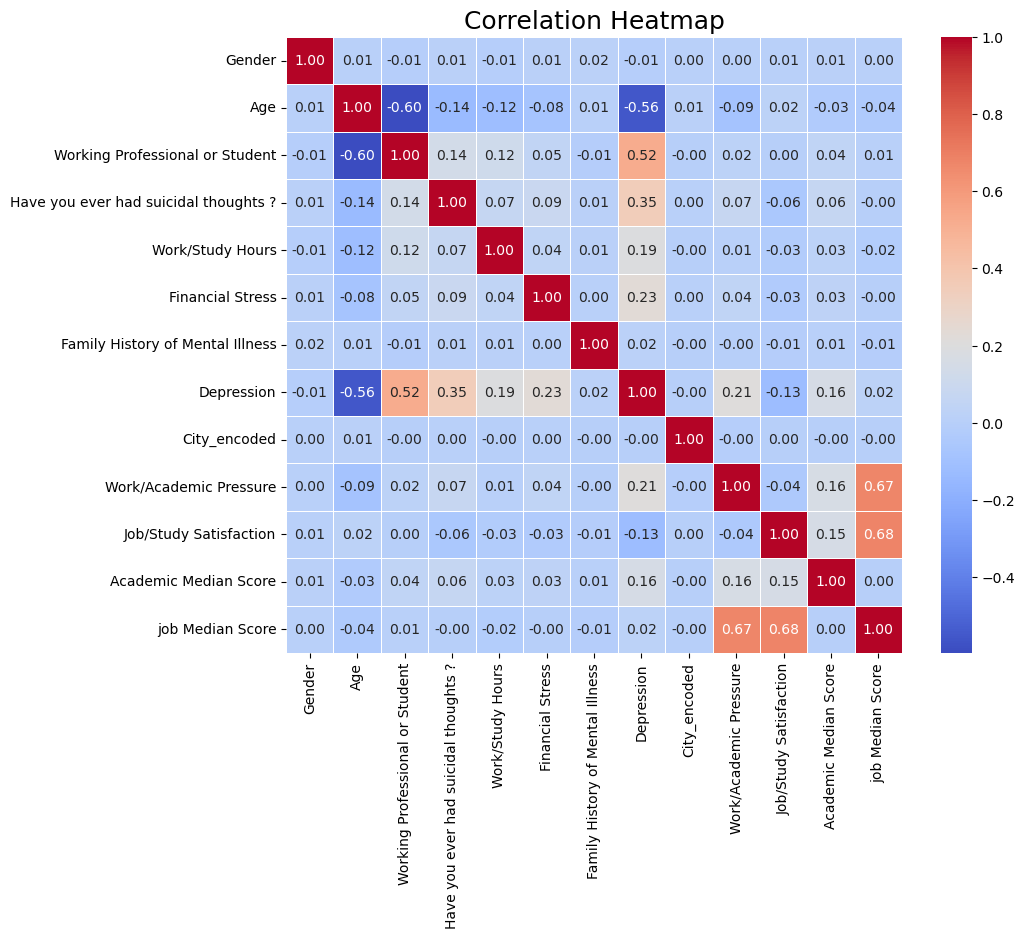

In [92]:
final_df = final_df.drop(['CGPA', 'CategoricalAge', 'CategoricalCGPA',
                          'Study Satisfaction', 'Job Satisfaction', 'Academic Pressure', 'Work Pressure'], axis=1)


df_numerical_features   = final_df.select_dtypes(exclude='object')
df_categorical_features = final_df.select_dtypes(include='object')


def plot_correlation_heatmap(data):
    plt.figure(figsize=(10, 8))
    correlation_matrix = data.corr()
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)
    plt.title('Correlation Heatmap', fontsize=18)
    plt.show()

# Call the function to plot
plot_correlation_heatmap(df_numerical_features)

In [93]:
final_df = pd.get_dummies(final_df, drop_first=True, dtype=int)
final_df

,Gender,Age,Working Professional or Student,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,City_encoded,Work/Academic Pressure,...,Sleep Duration_7-8 hours,Sleep Duration_Less than 5 hours,Sleep Duration_More than 8 hours,Sleep Duration_others,Dietary Habits_Moderate,Dietary Habits_Unhealthy,Dietary Habits_others,Degree_B.Ed,Degree_Class 12,Degree_others
0,1,3,0,0,1.0,2.0,0,0.0,0.037403,6.5,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,1,7.0,3.0,0,1.0,0.032657,5.5,...,0,1,0,0,0,1,0,0,0,1
2,0,1,1,1,3.0,1.0,0,1.0,0.036640,5.5,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,10.0,1.0,1,1.0,0.034520,6.5,...,0,1,0,0,1,0,0,0,0,1
4,1,1,0,1,9.0,4.0,1,0.0,0.031454,2.5,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234495,1,3,0,1,2.0,2.0,1,NaN,0.030712,4.5,...,0,1,0,0,1,0,0,0,0,1
234496,0,1,0,1,11.0,3.0,1,NaN,0.039616,6.5,...,1,0,0,0,1,0,0,0,0,1
234497,0,0,1,0,7.0,1.0,0,NaN,0.036640,3.5,...,1,0,0,0,1,0,0,0,0,1
234498,1,0,0,1,7.0,5.0,1,NaN,0.046814,5.5,...,0,0,0,0,0,0,0,0,0,1


# 6. Features and Target

In [94]:
X = final_df[:140700].drop(['Depression'], axis=1)
y = final_df[:140700]['Depression']

test = final_df[140700:].drop(['Depression'], axis=1)

In [95]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random

# Set random seeds for reproducibility
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Split into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.1,       # 10% test set, adjust as needed
    stratify=y,          # Ensures similar class distribution in train and test sets
    random_state=SEED      # For reproducibility
)

# Define input dimensions (number of features after encoding)
input_dim = X_train.shape[1]

In [97]:
X_train.columns

Index(['Gender', 'Age', 'Working Professional or Student',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'City_encoded',
       'Work/Academic Pressure', 'Job/Study Satisfaction',
       ...
       'Sleep Duration_7-8 hours', 'Sleep Duration_Less than 5 hours',
       'Sleep Duration_More than 8 hours', 'Sleep Duration_others',
       'Dietary Habits_Moderate', 'Dietary Habits_Unhealthy',
       'Dietary Habits_others', 'Degree_B.Ed', 'Degree_Class 12',
       'Degree_others'],
      dtype='object', length=708)

In [98]:
# # # from sklearn.preprocessing import StandardScaler


# numerical = ['Age', 'Work/Study Hours', 'Financial Stress', 'City_encoded',
#        'Work/Academic Pressure', 'Job/Study Satisfaction',
#        'Academic Median Score', 'job Median Score']



# # numerical = df_numerical_features
# # Initialize the StandardScaler
# std_scaler = StandardScaler()

# # Fit the scaler on the training data and transform the numerical features
# X_train[numerical] = std_scaler.fit_transform(X_train[numerical])

In [99]:
# Transform the numerical features of the test data using the fitted scaler
# X_test[numerical] = std_scaler.transform(X_test[numerical])

In [100]:
# test[numerical] = std_scaler.fit_transform(test[numerical])

# 7. ML

In [101]:
from catboost import CatBoostClassifier, Pool

In [102]:
# Calculate class weights
# class_weights = {
#     0: len(y) / (2 * sum(y == 0)),  # Majority class weight
#     1: len(y) / (2 * sum(y == 1))   # Minority class weight
# }


# Initialize the CatBoostClassifier
model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    eval_metric='AUC',  # Or choose another metric
    verbose=100
)

In [110]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score

# Set up k-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Evaluate the model using cross-validation for accuracy on the training data
cv_accuracy_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

# Evaluate the model using cross-validation for F1 score on the training data
cv_f1_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1_weighted')  # or f1_macro, f1_micro, etc.

# Print cross-validation results for accuracy
print("Cross-Validation Accuracy Scores:", cv_accuracy_scores)
print("Mean CV Accuracy:", cv_accuracy_scores.mean())
print("Standard Deviation of CV Accuracy:", cv_accuracy_scores.std())

# Print cross-validation results for F1 score
print("Cross-Validation F1 Scores:", cv_f1_scores)
print("Mean CV F1 Score:", cv_f1_scores.mean())
print("Standard Deviation of CV F1 Score:", cv_f1_scores.std())

# Optionally, evaluate the model on the test set if you want a separate test set evaluation
model.fit(X_train, y_train)  # Fit model on the full training set
test_accuracy = accuracy_score(y_test, model.predict(X_test))
test_f1 = f1_score(y_test, model.predict(X_test), average='weighted')  # adjust average as needed

# Print test set results
print("Test Set Accuracy:", test_accuracy)
print("Test Set F1 Score:", test_f1)

0:	total: 171ms	remaining: 1m 25s
100:	total: 6.51s	remaining: 25.7s
200:	total: 11.6s	remaining: 17.3s
300:	total: 16.6s	remaining: 10.9s
400:	total: 22.5s	remaining: 5.55s
499:	total: 27s	remaining: 0us
0:	total: 43.3ms	remaining: 21.6s
100:	total: 6.41s	remaining: 25.3s
200:	total: 11.7s	remaining: 17.4s
300:	total: 17s	remaining: 11.3s
400:	total: 23s	remaining: 5.67s
499:	total: 28s	remaining: 0us
0:	total: 57.4ms	remaining: 28.6s
100:	total: 6.31s	remaining: 24.9s
200:	total: 11.8s	remaining: 17.6s
300:	total: 17.4s	remaining: 11.5s
400:	total: 24.3s	remaining: 6s
499:	total: 30.5s	remaining: 0us
0:	total: 55.6ms	remaining: 27.7s
100:	total: 6.92s	remaining: 27.3s
200:	total: 11.7s	remaining: 17.5s
300:	total: 16.5s	remaining: 10.9s
400:	total: 22.7s	remaining: 5.61s
499:	total: 28.6s	remaining: 0us
0:	total: 58.1ms	remaining: 29s
100:	total: 7.42s	remaining: 29.3s
200:	total: 12.9s	remaining: 19.2s
300:	total: 18.3s	remaining: 12.1s
400:	total: 24.1s	remaining: 5.95s
499:	total:

In [103]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, make_scorer, f1_score

# Set up k-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Evaluate the model using cross-validation for accuracy
cv_accuracy_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

# Evaluate the model using cross-validation for F1 score (adjust average if needed for multi-class)
cv_f1_scores = cross_val_score(model, X, y, cv=cv, scoring='f1_weighted')  # or f1_macro, f1_micro, etc.

# Print cross-validation results for accuracy
print("Cross-Validation Accuracy Scores:", cv_accuracy_scores)
print("Mean CV Accuracy:", cv_accuracy_scores.mean())
print("Standard Deviation of CV Accuracy:", cv_accuracy_scores.std())

# Print cross-validation results for F1 score
print("Cross-Validation F1 Scores:", cv_f1_scores)
print("Mean CV F1 Score:", cv_f1_scores.mean())
print("Standard Deviation of CV F1 Score:", cv_f1_scores.std())

0:	total: 222ms	remaining: 1m 50s
100:	total: 5.61s	remaining: 22.2s
200:	total: 10.1s	remaining: 15s
300:	total: 15.4s	remaining: 10.2s
400:	total: 21.9s	remaining: 5.4s
499:	total: 26.2s	remaining: 0us
0:	total: 124ms	remaining: 1m 1s
100:	total: 7.09s	remaining: 28s
200:	total: 12.1s	remaining: 18s
300:	total: 17.3s	remaining: 11.5s
400:	total: 23.3s	remaining: 5.76s
499:	total: 28.4s	remaining: 0us
0:	total: 60.6ms	remaining: 30.2s
100:	total: 7.64s	remaining: 30.2s
200:	total: 12.6s	remaining: 18.7s
300:	total: 17.7s	remaining: 11.7s
400:	total: 23.8s	remaining: 5.88s
499:	total: 28.9s	remaining: 0us
0:	total: 84.3ms	remaining: 42.1s
100:	total: 8.28s	remaining: 32.7s
200:	total: 13.8s	remaining: 20.6s
300:	total: 20.8s	remaining: 13.8s
400:	total: 26.8s	remaining: 6.63s
499:	total: 32.3s	remaining: 0us
0:	total: 85.4ms	remaining: 42.6s
100:	total: 7.33s	remaining: 28.9s
200:	total: 13.5s	remaining: 20.1s
300:	total: 20.5s	remaining: 13.5s
400:	total: 25.6s	remaining: 6.33s
499:	t

In [104]:
# train the model on whole data
model.fit(X, y, eval_set=(X, y), early_stopping_rounds=50)

0:	test: 0.9545476	best: 0.9545476 (0)	total: 75.4ms	remaining: 37.6s
100:	test: 0.9752772	best: 0.9752772 (100)	total: 7.78s	remaining: 30.7s
200:	test: 0.9764829	best: 0.9764829 (200)	total: 16.9s	remaining: 25.1s
300:	test: 0.9774362	best: 0.9774362 (300)	total: 24.3s	remaining: 16.1s
400:	test: 0.9782985	best: 0.9782985 (400)	total: 32.2s	remaining: 7.95s
499:	test: 0.9790428	best: 0.9790428 (499)	total: 39.1s	remaining: 0us

bestTest = 0.9790427651
bestIteration = 499



In [105]:
# Make predictions
predictions = model.predict(X_test)

# Evaluate performance (you can use AUC, accuracy, etc.)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9449893390191898


In [105]:
Accuracy: 0.940227434257285

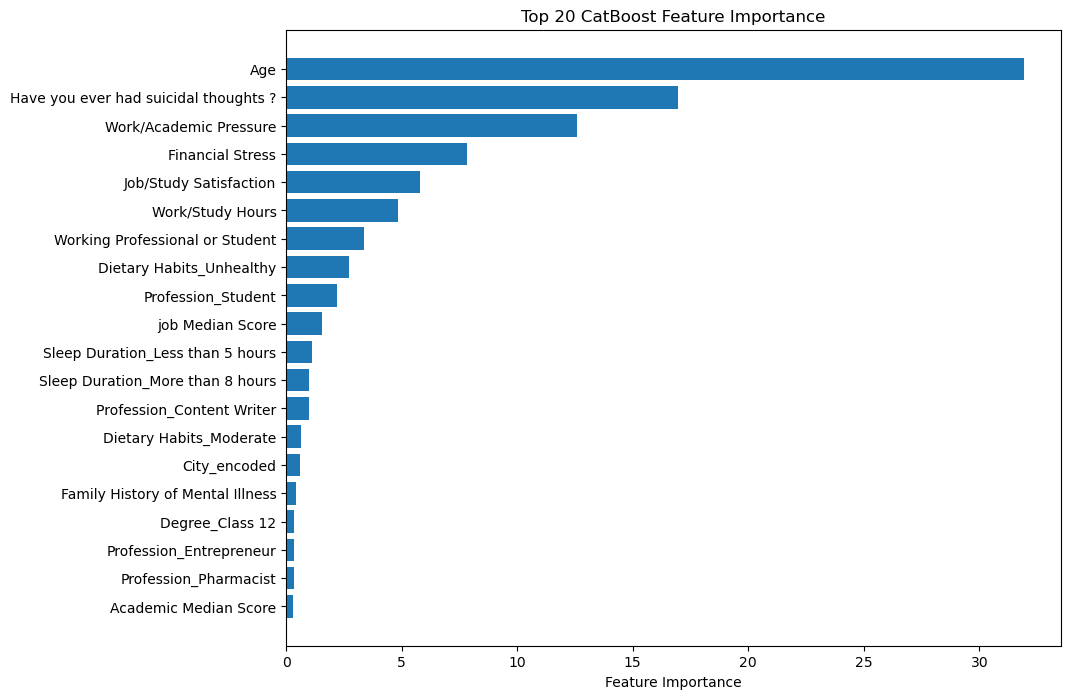

In [105]:
import matplotlib.pyplot as plt

# Get feature importances
feature_importance = model.get_feature_importance()

# Ensure `feature_names` is defined if `X_train` is a DataFrame
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'Feature {i}' for i in range(X_train.shape[1])]

# Sort feature importance values and names in descending order
sorted_idx = feature_importance.argsort()[::-1]
sorted_feature_importance = feature_importance[sorted_idx][:20]  # Select top 20
sorted_feature_names = [feature_names[i] for i in sorted_idx[:20]]  # Select top 20 names

# Plot top 20 sorted feature importance
plt.figure(figsize=(10, 8))
plt.barh(sorted_feature_names, sorted_feature_importance)
plt.xlabel("Feature Importance")
plt.title("Top 20 CatBoost Feature Importance")
plt.gca().invert_yaxis()  # To have the most important feature at the top
plt.show()

# 8. Prediction 

In [106]:
# Generate predictions
predictions = model.predict(test)

# Round predictions to 0 or 1
predictions = (predictions > 0.5).astype(int).flatten()

In [107]:
predictions

array([0, 0, 0, ..., 0, 1, 0])

In [108]:
start_id = 140700
submission = pd.DataFrame({
    'id': np.arange(start_id, start_id + len(predictions)),  # ID starting at 140700
    'Depression': predictions
})

In [109]:
submission.to_csv('submissionCATB 02.csv', index=False)

# Thanks